In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision

from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
from torchvision.models import resnet18

In [3]:
model = resnet18(pretrained=True)
model.fc = torch.nn.Linear(model.fc.in_features, 2)
model = model.to(device)

epochs = 2
learning_rate = 0.0005
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
creterion = nn.CrossEntropyLoss()

d:\Anconda\envs\DL\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Anconda\envs\DL\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
import gen_train_test_data
trainloader = gen_train_test_data.get_trainloader('data_train/')
testloader = gen_train_test_data.get_testloader('data_test/')

losses = []
train_accuracies = []
train_precisions = []
train_recalls = []
train_F1_scores = []
test_accuracies = []
test_precisions = []
test_recalls = []
test_F1_scores = []
turns = c1 = c2 = 0

for epoch in range(epochs):
    model = model.train()
    for x, y in trainloader:
        inputs = x.to(device)
        labels = y.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = creterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        with torch.no_grad():
            turns += 1
            _, predicted = torch.max(outputs.cpu(), dim=1)
            labels = labels.cpu()
            tp = torch.sum((labels.reshape(-1) == 0) & (predicted == 0)).item()
            tn = torch.sum((labels.reshape(-1) == 1) & (predicted == 1)).item()
            fp = torch.sum((labels.reshape(-1) == 1) & (predicted == 0)).item()
            fn = torch.sum((labels.reshape(-1) == 0) & (predicted == 1)).item()
            accuracy = (tp+tn)/(tp+tn+fp+fn)
            precision = tp/(tp+fp) if ((tp+fp)!=0) else 0
            recall = tp/(tp+fn) if ((tp+fn)!=0) else 0
            train_accuracies.append(accuracy)
            train_precisions.append(precision)
            train_recalls.append(recall)
            train_F1_scores.append((2*precision*recall/(precision+recall)) if ((precision+recall)!=0) else 0)
            print(f'turns:{turns}, loss:{loss.item()}')

    model = model.eval()
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs.to(device))
            _, predicted = torch.max(outputs.cpu(), dim=1)
            labels = labels.cpu()
            tp = torch.sum((labels.reshape(-1) == 0) & (predicted == 0)).item()
            tn = torch.sum((labels.reshape(-1) == 1) & (predicted == 1)).item()
            fp = torch.sum((labels.reshape(-1) == 1) & (predicted == 0)).item()
            fn = torch.sum((labels.reshape(-1) == 0) & (predicted == 1)).item()
            accuracy = (tp+tn)/(tp+tn+fp+fn)
            precision = tp/(tp+fp) if ((tp+fp)!=0) else 0
            recall = tp/(tp+fn) if ((tp+fn)!=0) else 0
            test_accuracies.append(accuracy)
            test_precisions.append(precision)
            test_recalls.append(recall)
            test_F1_scores.append((2*precision*recall/(precision+recall)) if ((precision+recall)!=0) else 0)

turns:1, loss:0.8164709210395813
turns:2, loss:0.4601517617702484
turns:3, loss:0.23706674575805664
turns:4, loss:0.20636805891990662
turns:5, loss:0.355442076921463
turns:6, loss:0.004845192190259695
turns:7, loss:0.13914339244365692
turns:8, loss:0.06593890488147736
turns:9, loss:0.3022766709327698
turns:10, loss:0.03965746611356735
turns:11, loss:0.002539226785302162
turns:12, loss:0.04411226138472557
turns:13, loss:0.03893618285655975
turns:14, loss:0.1312221735715866
turns:15, loss:0.027573514729738235
turns:16, loss:0.7986704111099243
turns:17, loss:0.00028249077149666846
turns:18, loss:0.03299976512789726
turns:19, loss:0.3668747842311859
turns:20, loss:0.4600555896759033
turns:21, loss:0.006806753575801849
turns:22, loss:0.515533447265625
turns:23, loss:0.4981987476348877
turns:24, loss:0.4505841135978699
turns:25, loss:0.04041152447462082
turns:26, loss:0.8257102966308594
turns:27, loss:0.1184563860297203
turns:28, loss:0.08422069251537323
turns:29, loss:0.030368398874998093
t

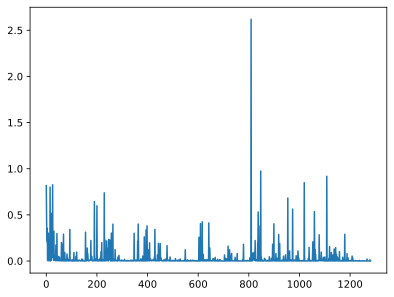

In [5]:
plt.plot(range(len(losses)), losses)

训练集精度: 100.0%


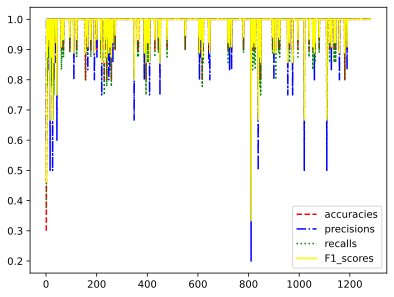

In [6]:
lens = len(train_accuracies)+1
plt.plot(range(1, lens), train_accuracies, color='red', linestyle='--', label='accuracies')
plt.plot(range(1, lens), train_precisions, color='blue', linestyle='-.', label='precisions')
plt.plot(range(1, lens), train_recalls, color='green', linestyle=':', label='recalls')
plt.plot(range(1, lens), train_F1_scores, color='yellow', linestyle='-', label='F1_scores')
plt.legend()

print(f'训练集精度: {100*train_accuracies[lens-2]}%')

测试集准确度: 50.0%
测试集精确度: 0%
测试集召回率: 0.0%
测试集F1值: 0%


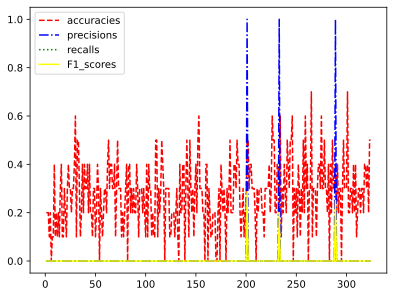

In [7]:
lens = len(test_accuracies)+1
plt.plot(range(1, lens), test_accuracies, color='red', linestyle='--', label='accuracies')
plt.plot(range(1, lens), test_precisions, color='blue', linestyle='-.', label='precisions')
plt.plot(range(1, lens), test_recalls, color='green', linestyle=':', label='recalls')
plt.plot(range(1, lens), test_F1_scores, color='yellow', linestyle='-', label='F1_scores')
plt.legend()

print(f'测试集准确度: {100*test_accuracies[lens-2]}%')
print(f'测试集精确度: {100*test_precisions[lens-2]}%')
print(f'测试集召回率: {100*test_recalls[lens-2]}%')
print(f'测试集F1值: {100*test_F1_scores[lens-2]}%')

In [8]:
'''
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs.to(device))
        _, predicted = torch.max(outputs.cpu(), dim=1)
        labels = labels.cpu()
        tp += torch.sum((labels.reshape(-1) == 0) & (predicted == 0)).item()
        tn += torch.sum((labels.reshape(-1) == 1) & (predicted == 1)).item()
        fp += torch.sum((labels.reshape(-1) == 1) & (predicted == 0)).item()
        fn += torch.sum((labels.reshape(-1) == 0) & (predicted == 1)).item()
accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp) if ((tp+fp)!=0) else 0
recall = tp/(tp+fn) if ((tp+fn)!=0) else 0
print(f'测试集准确率: {100*accuracy}%')
print(f'测试集精确率: {100*precision}%')
print(f'测试集召回率: {100*recall}%')
print(f'测试集F1值: {(2*precision*recall/(precision+recall)) if ((precision+recall)!=0) else 0}')
'''

"\nwith torch.no_grad():\n    for inputs, labels in testloader:\n        outputs = model(inputs.to(device))\n        _, predicted = torch.max(outputs.cpu(), dim=1)\n        labels = labels.cpu()\n        tp = torch.sum((labels.reshape(-1) == 0) & (predicted == 0)).item()\n        tn = torch.sum((labels.reshape(-1) == 1) & (predicted == 1)).item()\n        fp = torch.sum((labels.reshape(-1) == 1) & (predicted == 0)).item()\n        fn = torch.sum((labels.reshape(-1) == 0) & (predicted == 1)).item()\naccuracy = (tp+tn)/(tp+tn+fp+fn)\nprecision = tp/(tp+fp) if ((tp+fp)!=0) else 0\nrecall = tp/(tp+fn) if ((tp+fn)!=0) else 0\nprint(f'测试集准确率: {100*accuracy}%')\nprint(f'测试集精确率: {100*precision}%')\nprint(f'测试集召回率: {100*recall}%')\nprint(f'测试集F1值: {(2*precision*recall/(precision+recall)) if ((precision+recall)!=0) else 0}')\n"

In [9]:
'''
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs.to(device))
        _, predicted = torch.max(outputs.cpu(), dim=1)
        for i in range(len(predicted)):
            print(f'predict:{predicted[i]}, label:{labels[i]}')
'''

"\nwith torch.no_grad():\n    for inputs, labels in testloader:\n        outputs = model(inputs.to(device))\n        _, predicted = torch.max(outputs.cpu(), dim=1)\n        for i in range(len(predicted)):\n            print(f'predict:{predicted[i]}, label:{labels[i]}')\n"

In [10]:
# torch.save(model.state_dict(), './mymodel/ResNet18/lr=0.0005.pth')